In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [9]:

# keras.datasets.mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images[0],train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

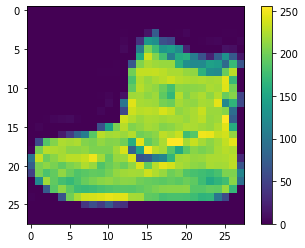

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

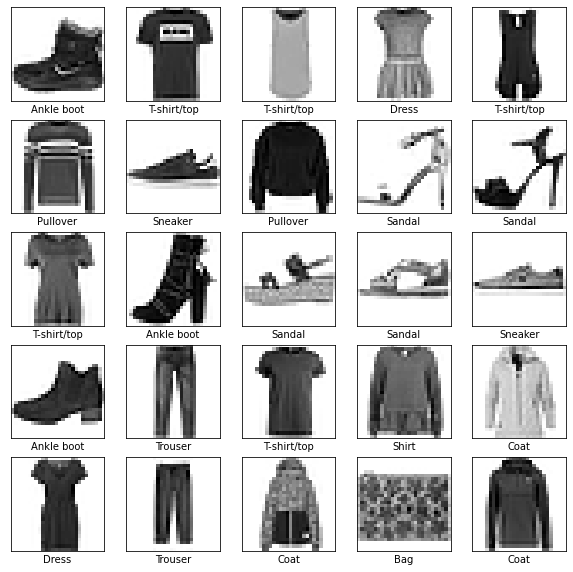

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

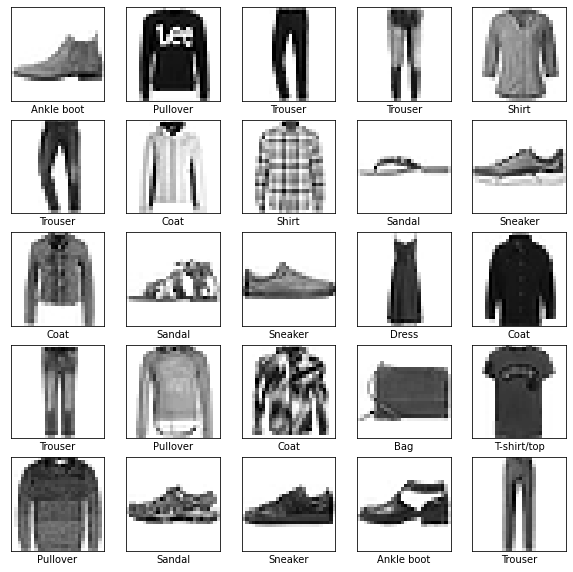

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [23]:
#층설계
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# 모델컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#훈련 
model.fit(train_images, train_labels, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 43us/sample - loss: 1.0789 - accuracy: 0.6607
Epoch 2/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.6403 - accuracy: 0.7694
Epoch 3/50
60000/60000 [==============================] - 2s 42us/sample - loss: 0.5648 - accuracy: 0.7972
Epoch 4/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5225 - accuracy: 0.8155
Epoch 5/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4947 - accuracy: 0.8260
Epoch 6/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4748 - accuracy: 0.8330
Epoch 7/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4598 - accuracy: 0.8388
Epoch 8/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4488 - accuracy: 0.8420
Epoch 9/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4385 - accuracy: 0.8458
Epoch 10/50
60

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.3753 - accuracy: 0.8659

테스트 정확도: 0.8659


In [25]:
predictions = model.predict(test_images)
print(predictions[0])

[8.6929425e-08 4.8103727e-10 2.4082749e-06 7.1733399e-07 4.1078415e-06
 6.6454135e-02 3.8542250e-05 3.7868787e-02 1.8884634e-03 8.9374280e-01]


In [26]:
print(np.argmax(predictions[0]))

9


In [17]:
print( class_names[ np.argmax(predictions[0]) ])

Ankle boot


In [30]:
#단일 이미지 예측 하기 
img = test_images[0]
print(img.shape)
predictions_single = model.predict(np.expand_dims(img,0))
print(predictions_single)

(28, 28)
[[8.6929411e-08 4.8103904e-10 2.4082724e-06 7.1733388e-07 4.1078451e-06
  6.6454180e-02 3.8542243e-05 3.7868798e-02 1.8884632e-03 8.9374268e-01]]


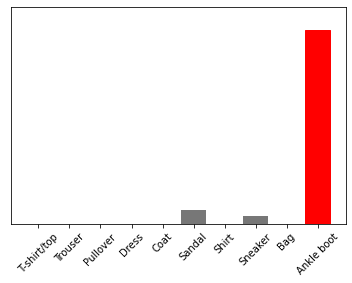

In [33]:

plt.grid(False)
#plt.xticks([])
plt.xticks(range(10), class_names, rotation=45)
plt.yticks([])
thisplot = plt.bar(range(10), predictions_single[0], color="#777777")
plt.ylim([0, 1])
predicted_label = np.argmax(predictions_single)
thisplot[predicted_label].set_color('red')
# thisplot[predicted_label].set_color('blue')